#Connecting libraries

In [22]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as sklearn_metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor    
import missingno as msno
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import seaborn

In [ ]:
!pip install -U keras-tuner

from keras_tuner import RandomSearch, Hyperband, BayesianOptimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.8 MB/s 


#Loading dataset

In [23]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(len(train))
print(len(test))

47439
31626


In [ ]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


Дубликатов нет.

In [ ]:
train['Year built'].unique()

array([1969., 1926., 1958., 1947.,   nan, 1905., 2005., 2001., 1973.,
       1953., 2002., 1923., 2018., 1986., 1939., 1949., 1988., 1922.,
       1920., 1952., 1938., 1956., 1977., 2019., 1970., 1957., 2003.,
       1941., 1928., 1936., 1991., 1929., 1950., 1972., 1965., 1933.,
       1964., 1968., 1924.,    0., 2009., 1966., 1963., 1975., 1948.,
       1960., 1955., 1998., 2015., 1942., 1927., 1914., 1940., 2014.,
       1974., 1959., 1990., 1921., 1997., 2000., 1930., 1978., 1945.,
       1900., 1980., 1979., 1912., 2008., 1962., 1989., 1967., 1976.,
       1925., 1985., 2016., 1987., 1860., 1904., 1935., 1918., 1982.,
       1995., 1946., 1911., 1909., 1971., 1961., 1943., 1983., 2006.,
       1951., 1910., 2007., 2004., 1984., 1981., 1934., 2011., 1907.,
       1903., 1913., 2017., 1915., 1999., 1908., 1954., 1868., 2010.,
       1944., 1994., 1931., 1906., 1902., 1937., 1992., 1919., 2013.,
       1895., 1996., 1885., 1852., 1890., 1901., 2020., 2012., 1916.,
       1993., 1897.,

In [ ]:
train[train['Year built'] == 9999]

,Sold Price,Year built,Total interior livable area,Region,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,City,State
46898,492000.0,9999.0,962.0,San Diego,5.0,0.2,5.0,2.1,5.0,0.6,96125.0,1098.0,509000.0,San Diego,CA


In [ ]:
train.isna().sum(axis = 0)  

Id                                 0
Address                            0
Sold Price                         0
Summary                          350
Type                               0
Year built                      1045
Heating                         6465
Cooling                        10622
Parking                          908
Lot                            14181
Bedrooms                        2872
Bathrooms                       3465
Full bathrooms                  7865
Total interior livable area     2526
Total spaces                     916
Garage spaces                    917
Region                             2
Elementary School               4742
Elementary School Score         4896
Elementary School Distance      4742
Middle School                  16704
Middle School Score            16705
Middle School Distance         16704
High School                     5000
High School Score               5219
High School Distance            5001
Flooring                       11564
H

In [ ]:
test.isna().sum(axis = 0)  

Id                                 0
Address                            0
Summary                          489
Type                               0
Year built                       897
Heating                         5048
Cooling                         4487
Parking                          768
Lot                             8808
Bedrooms                        1726
Bathrooms                       1945
Full bathrooms                  5063
Total interior livable area     1352
Total spaces                     751
Garage spaces                    750
Region                             0
Elementary School               3751
Elementary School Score         3839
Elementary School Distance      3751
Middle School                  11573
Middle School Score            11574
Middle School Distance         11573
High School                     2174
High School Score               2565
High School Distance            2174
Flooring                       10363
Heating features                5383
C

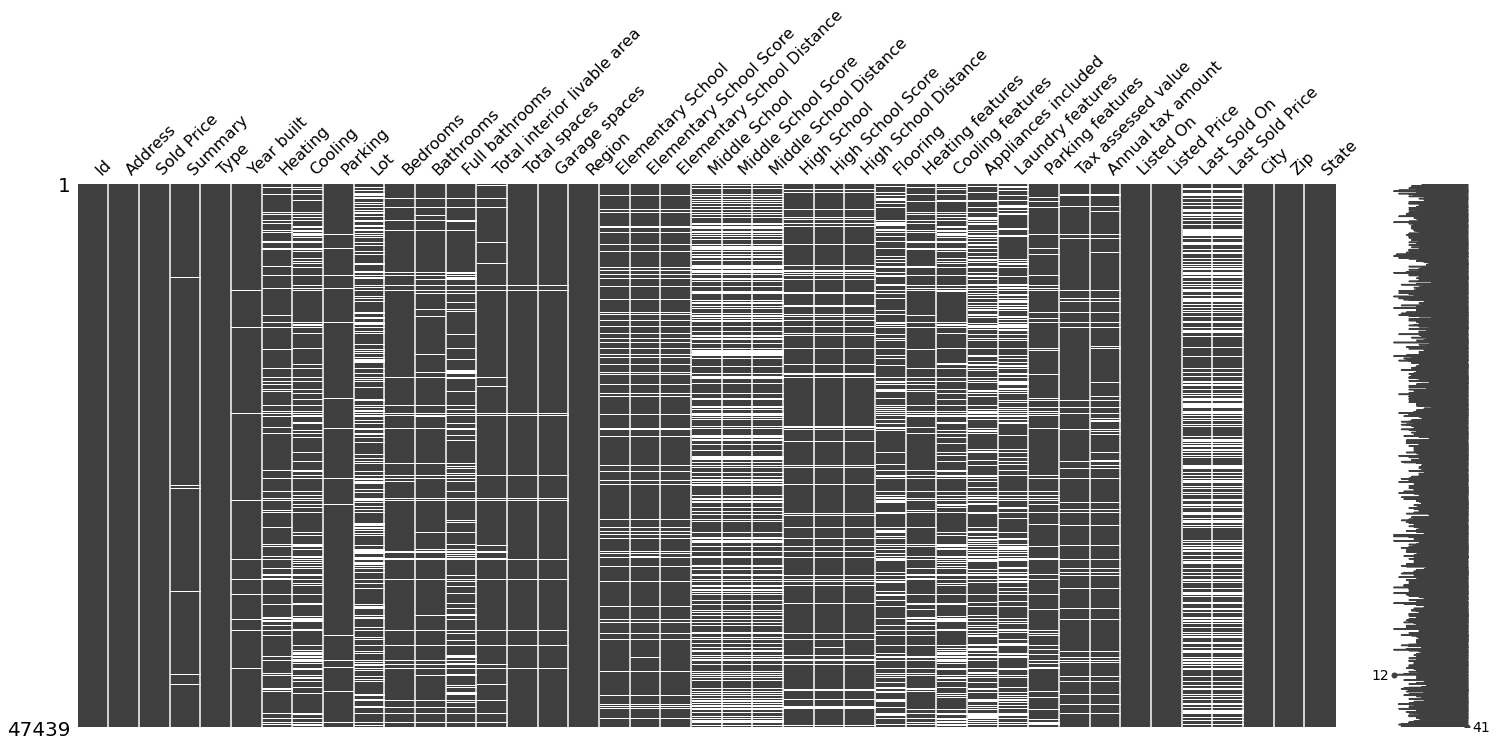

In [ ]:
msno.matrix(train)

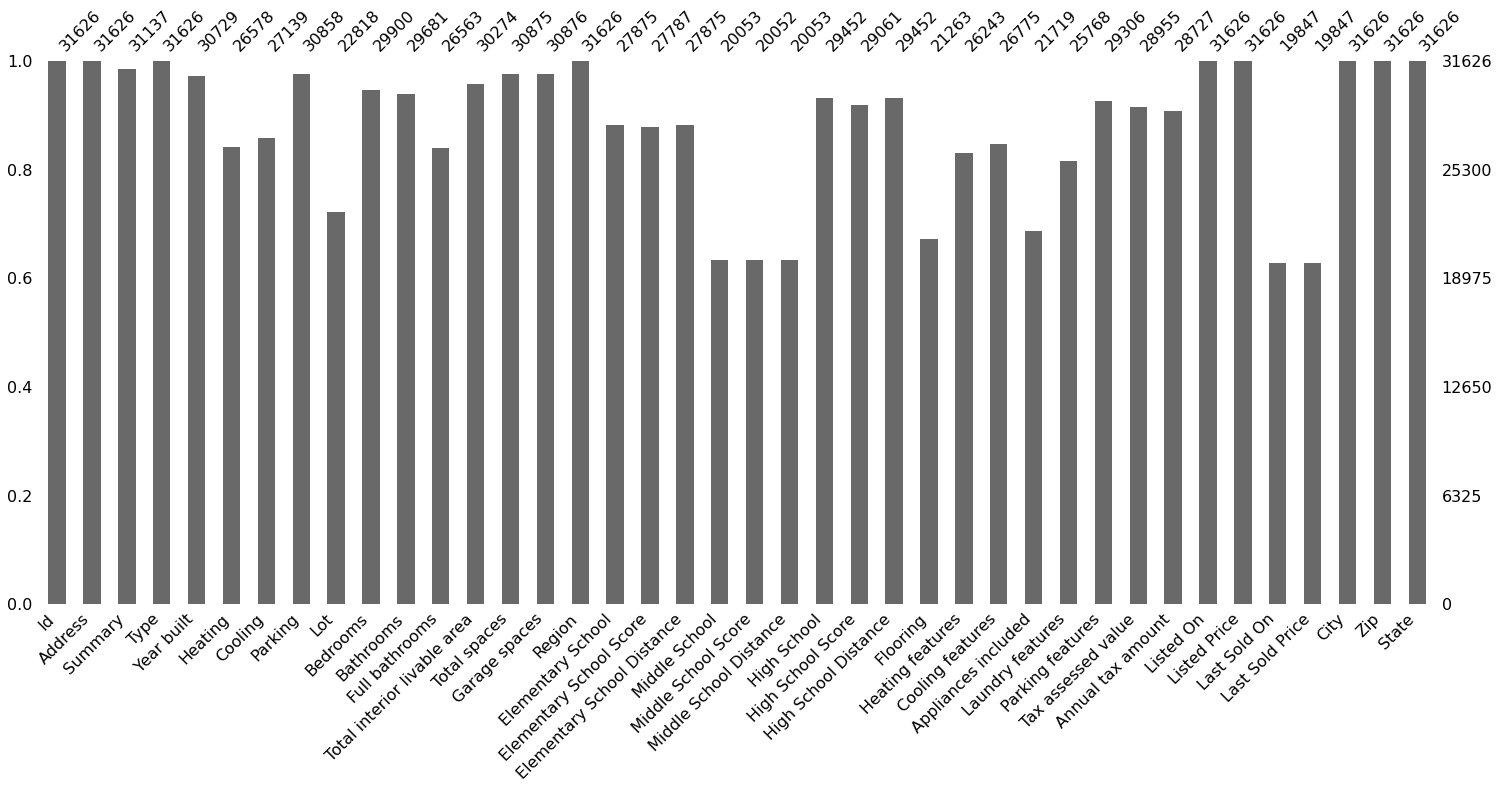

In [ ]:
msno.bar(test)

In [ ]:
array = train['Region'].unique()

print(len(array))
print(array)

950
['Los Altos' 'Los Angeles' 'Strawberry' 'Culver City' 'Creston' 'Stockton'
 'Taylorsville' 'San Francisco' 'Aptos' 'Santa Clara' 'San Jose'
 'Snelling' 'Sunnyvale' 'San Mateo' 'Compton' 'Carlotta' 'San Carlos'
 'Mountain View' 'Beverly Hills' 'Capitola' 'Los Gatos' 'West Hollywood'
 'Santa Cruz' 'Foster City' 'Cupertino' 'Watsonville' 'San Bruno' 'Urban'
 'Commerce' 'Redwood City' 'Milpitas' 'Saratoga' 'Lockwood' 'Freedom'
 'Ben Lomond' 'Cudahy' 'Palo Alto' 'Menlo Park' 'Montara' 'Loleta'
 'Atherton' 'Campbell' 'Los Olivos' 'Wallace' 'Patagonia' 'East Palo Alto'
 'Zamora' 'Pacifica' 'Manton' 'Loma Mar' 'Coleville' 'Belmont' 'Default'
 'Le Grand' 'Playa Vista' 'Point Reyes Station' 'South San Francisco'
 'San Simeon' 'Redway' 'Boulder Creek' 'Los Altos Hills' 'San Martin'
 'Woodside' 'Albion' 'Bradbury' 'Mt Baldy' 'Bell' 'Millbrae'
 'Clipper Mills' 'Tubac' 'Moss Beach' 'Heber' 'Soquel' 'Royal Oaks'
 'Half Moon Bay' 'Felton' 'Bakersfield' 'Nogales' 'Bolinas' 'Big Sur'
 'Whitmore' 'Ri

In [ ]:
train.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And...,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


#Removing non-relevant features

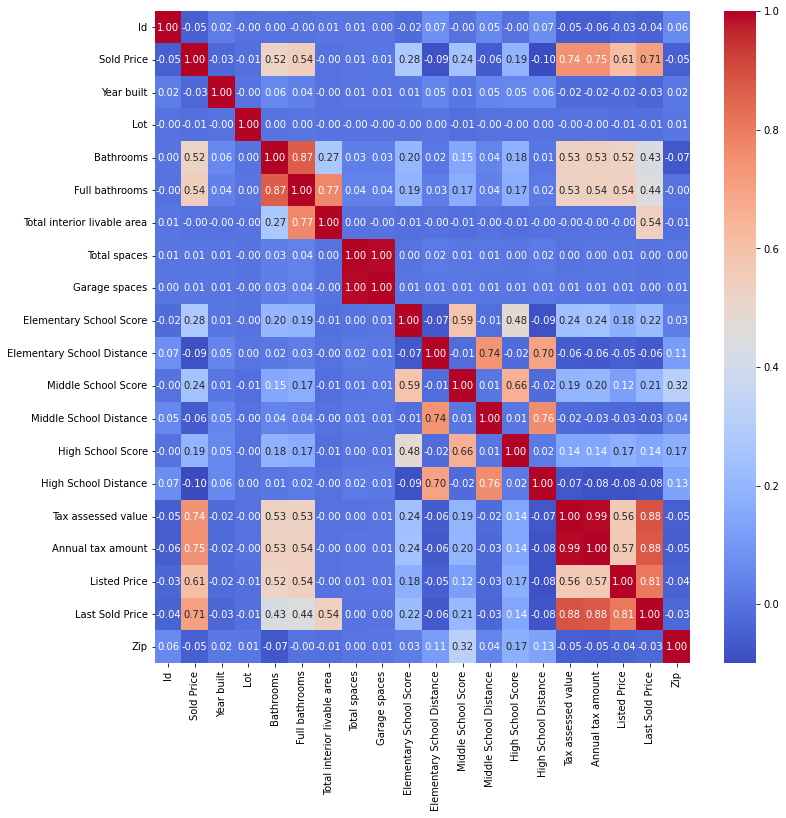

In [ ]:
plt.figure(figsize = (12, 12))
seaborn.heatmap(train.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

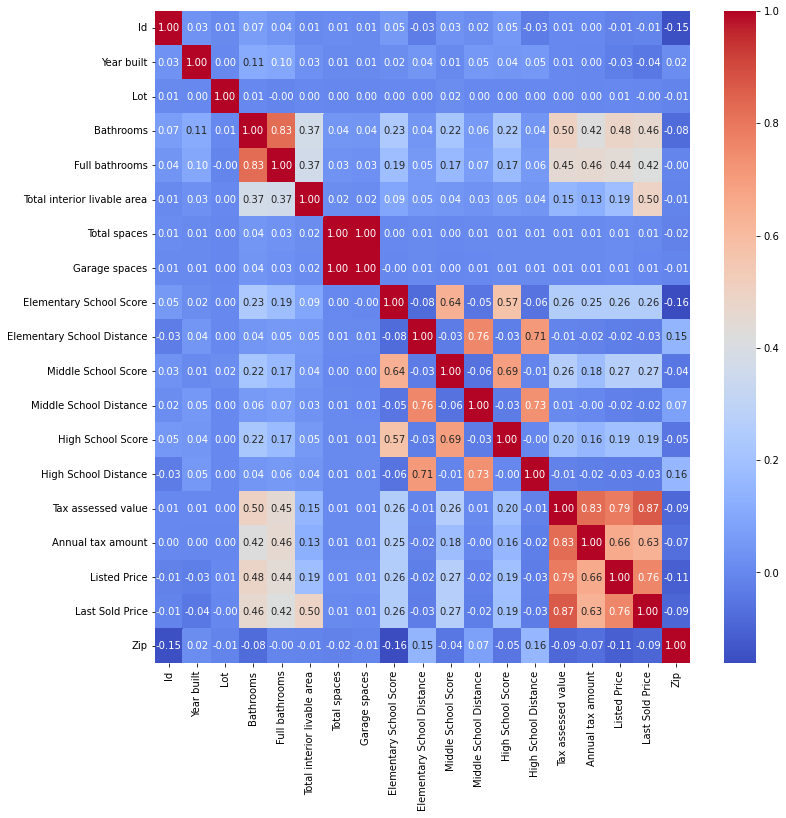

In [ ]:
plt.figure(figsize = (12, 12))
seaborn.heatmap(test.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

In [24]:
columns_to_delete = ['Id',
                     'Address', 
                     'Summary', 
                     'Type', 
                     'Heating', 
                     'Cooling', 
                     'Parking', 
                     'Lot', 
                     'Bedrooms', 
                     'Bathrooms', 
                     'Full bathrooms', 
                     'Total spaces', 
                     'Garage spaces', 
                     'Elementary School', 
                     'Middle School', 
                     'High School', 
                     'Flooring', 
                     'Heating features', 
                     'Cooling features', 
                     'Appliances included', 
                     'Laundry features', 
                     'Parking features', 
                     'Listed On', 
                     'Last Sold On', 
                     'Zip',
                     'City',
                     'State',
                     'Elementary School Distance', 
                     'Middle School Distance', 
                     'High School Distance',
                     'Region',
                     'Year built',
                     'Total interior livable area',
                     'Annual tax amount']

In [25]:
train.drop(columns = columns_to_delete, inplace = True)
train

,Sold Price,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
0,3825000.0,7.0,NaN,8.0,886486.0,4198000.0,NaN
1,505000.0,3.0,2.0,2.0,505000.0,525000.0,328000.0
2,140000.0,NaN,NaN,NaN,49627.0,180000.0,NaN
3,1775000.0,9.0,7.0,8.0,1775000.0,1895000.0,1500000.0
4,1175000.0,6.0,5.0,6.0,NaN,1595000.0,900000.0
...,...,...,...,...,...,...,...
47434,159000.0,3.0,NaN,3.0,125049.0,155000.0,NaN
47435,255000.0,5.0,6.0,7.0,68924.0,295900.0,NaN
47436,2300000.0,7.0,3.0,7.0,578000.0,2295000.0,2150000.0
47437,500000.0,7.0,7.0,8.0,484696.0,499888.0,500000.0


In [26]:
test.drop(columns = columns_to_delete, inplace = True)
test

,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
0,8.0,NaN,NaN,NaN,799900.0,819000.0
1,6.0,4.0,5.0,521977.0,479950.0,15000.0
2,8.0,NaN,NaN,NaN,839900.0,NaN
3,8.0,NaN,NaN,442800.0,809900.0,810000.0
4,4.0,4.0,5.0,965282.0,1095000.0,1041000.0
...,...,...,...,...,...,...
31621,5.0,7.0,7.0,4819317.0,8500000.0,895500.0
31622,3.0,6.0,NaN,296819.0,330000.0,328000.0
31623,8.0,3.0,5.0,NaN,443000.0,NaN
31624,7.0,4.0,6.0,334277.0,445000.0,470000.0


#Заполнение пропусков

In [ ]:
prop = 'Last Sold Price'

print(min(train[prop]))
print(max(train[prop]))
print(np.mean(train[prop]))

nan
nan
807853.7111515519


In [ ]:
train.isna().sum(axis = 0)  

Id                             0
Sold Price                     0
Elementary School Score     4896
Middle School Score        16705
High School Score           5219
Tax assessed value          3652
Listed Price                   0
Last Sold Price            17766
dtype: int64

In [27]:
train['Elementary School Score'].fillna(0, inplace = True)
train['Middle School Score'].fillna(0, inplace = True)
train['High School Score'].fillna(0, inplace = True)
train['Tax assessed value'].fillna(np.mean(train['Tax assessed value']), inplace = True)
train['Last Sold Price'].fillna(np.mean(train['Last Sold Price']), inplace = True)

In [28]:
train.isna().sum(axis = 0)  

Sold Price                 0
Elementary School Score    0
Middle School Score        0
High School Score          0
Tax assessed value         0
Listed Price               0
Last Sold Price            0
dtype: int64

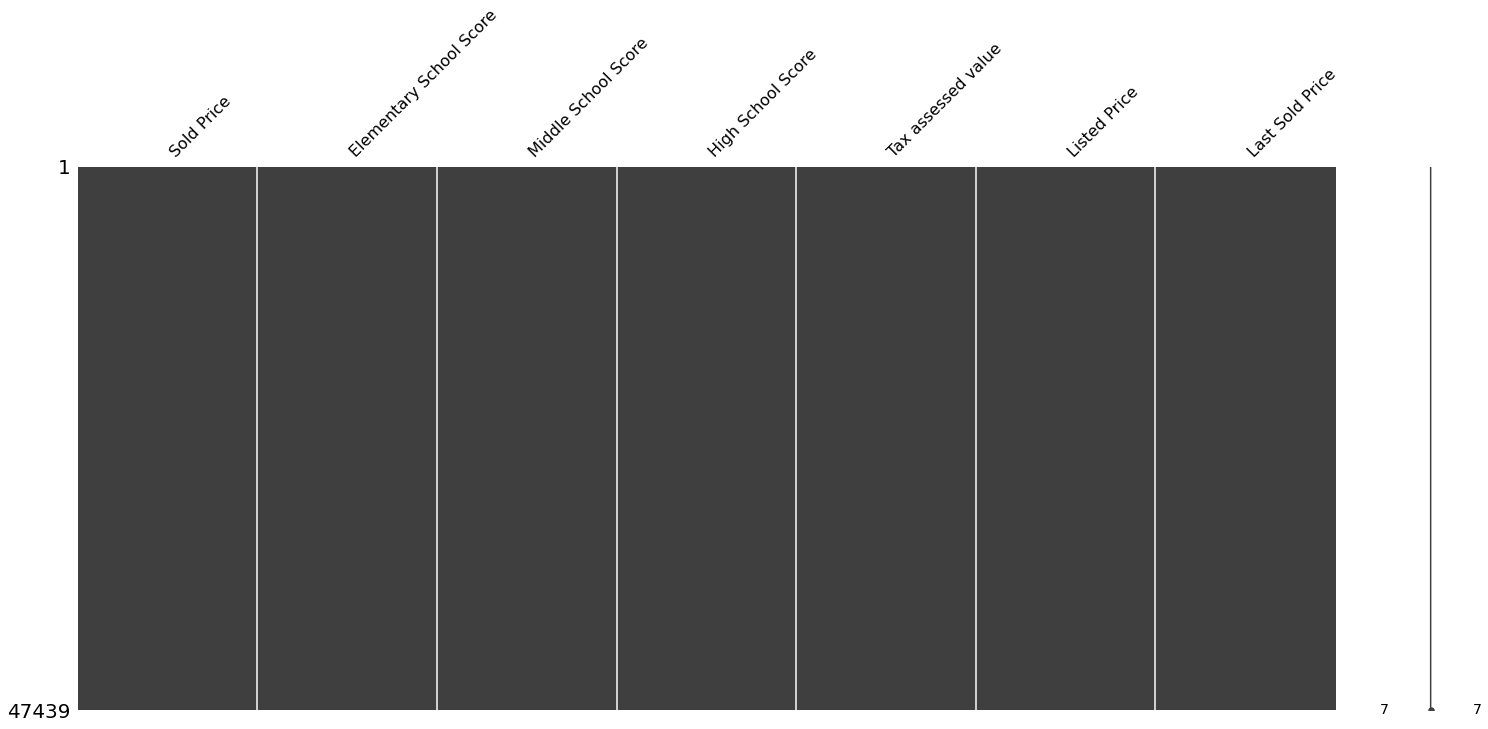

In [29]:
msno.matrix(train)

In [30]:
test.isna().sum(axis = 0)  

Elementary School Score     3839
Middle School Score        11574
High School Score           2565
Tax assessed value          2671
Listed Price                   0
Last Sold Price            11779
dtype: int64

In [31]:
test['Elementary School Score'].fillna(0, inplace = True)
test['Middle School Score'].fillna(0, inplace = True)
test['High School Score'].fillna(0, inplace = True)
test['Tax assessed value'].fillna(np.mean(test['Tax assessed value']), inplace = True)
test['Last Sold Price'].fillna(np.mean(test['Last Sold Price']), inplace = True)

In [32]:
test.isna().sum(axis = 0)  

Elementary School Score    0
Middle School Score        0
High School Score          0
Tax assessed value         0
Listed Price               0
Last Sold Price            0
dtype: int64

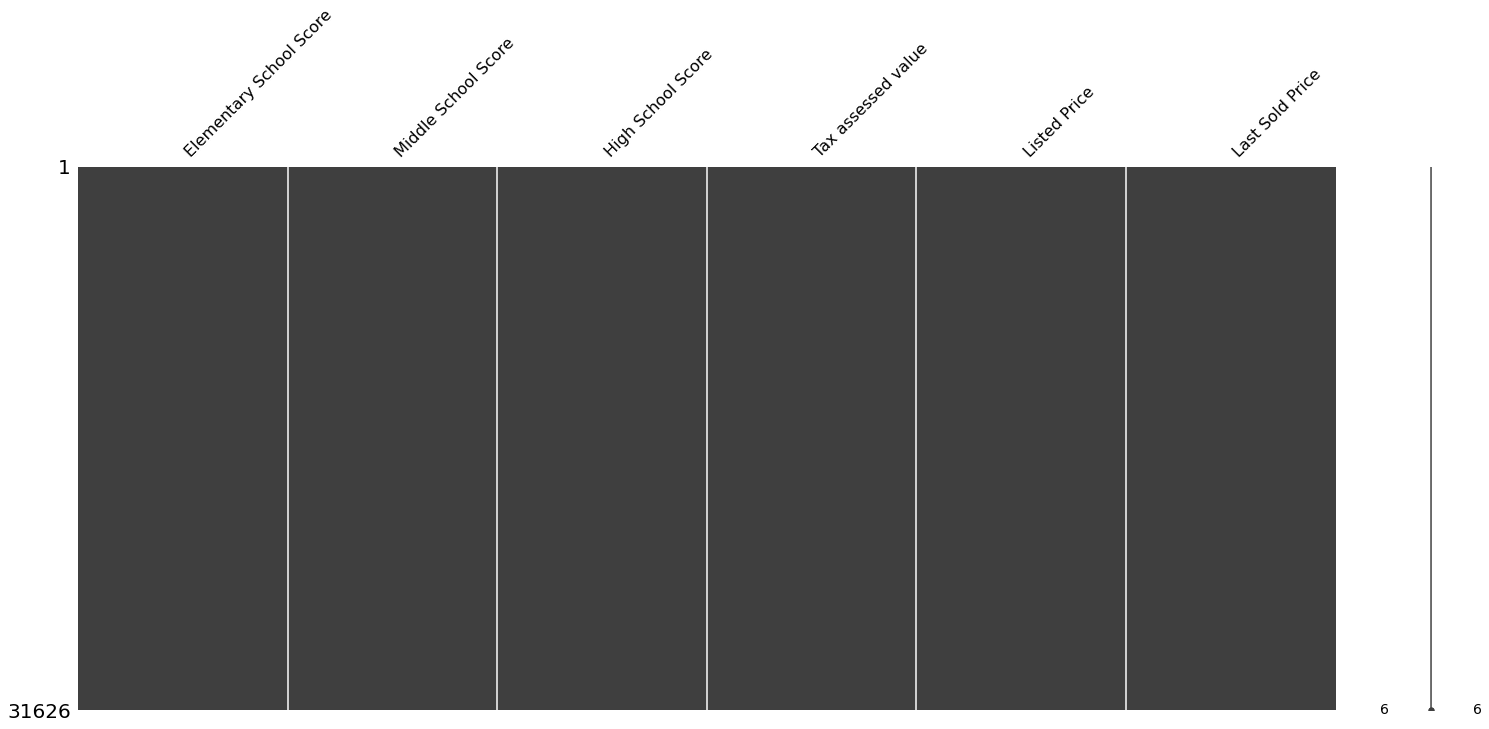

In [33]:
msno.matrix(test)

#Standardization

In [35]:
train_columns = list(train.columns)
train_columns.pop(0)
train_columns

['Elementary School Score',
 'Middle School Score',
 'High School Score',
 'Tax assessed value',
 'Listed Price',
 'Last Sold Price']

In [36]:
scaler = StandardScaler()
train_matrix = scaler.fit_transform(train.drop(columns = ['Sold Price']))

train_processed = pd.DataFrame(train_matrix, columns = train_columns)
train_processed.insert(0, 'Sold Price', train['Sold Price'])
train_processed

,Sold Price,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
0,3825000.0,0.706819,-1.145188,0.947451,0.090058,1.096415,1.249669e-16
1,505000.0,-0.805416,-0.480314,-1.290160,-0.252904,-0.300871,-5.151027e-01
2,140000.0,-1.939592,-1.145188,-2.036030,-0.662292,-0.432116,1.249669e-16
3,1775000.0,1.462937,1.181874,0.947451,0.888848,0.220305,7.429898e-01
4,1175000.0,0.328760,0.516999,0.201581,0.000000,0.106179,9.891515e-02
...,...,...,...,...,...,...,...
47434,159000.0,-0.805416,-1.145188,-0.917225,-0.594487,-0.441627,1.249669e-16
47435,255000.0,-0.049299,0.849436,0.574516,-0.644944,-0.388026,1.249669e-16
47436,2300000.0,0.706819,-0.147876,0.574516,-0.187276,0.372474,1.440737e+00
47437,500000.0,0.706819,1.181874,0.947451,-0.271158,-0.310424,-3.304680e-01


In [37]:
train_processed.describe()

,Sold Price,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
count,4.743900e+04,4.743900e+04,4.743900e+04,4.743900e+04,4.743900e+04,4.743900e+04,4.743900e+04
mean,1.296050e+06,-3.193147e-15,6.406852e-17,-6.081548e-17,-5.039639e-17,-2.980201e-16,2.091146e-16
std,1.694452e+06,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,1.005000e+05,-1.939592e+00,-1.145188e+00,-2.036030e+00,-7.069079e-01,-5.005921e-01,-8.671968e-01
25%,5.650000e+05,-8.054161e-01,-1.145188e+00,-5.442893e-01,-4.572364e-01,-2.820403e-01,-3.465698e-01
50%,9.600000e+05,-4.929850e-02,-1.478761e-01,2.015811e-01,-1.621034e-01,-1.395727e-01,1.249669e-16
75%,1.525000e+06,7.068191e-01,8.494362e-01,5.745163e-01,9.998983e-02,6.959939e-02,1.249669e-16
max,9.000000e+07,1.840995e+00,1.846748e+00,1.693322e+00,4.055799e+01,1.526310e+02,9.574400e+01


In [39]:
test_columns = list(test.columns)
test_columns

['Elementary School Score',
 'Middle School Score',
 'High School Score',
 'Tax assessed value',
 'Listed Price',
 'Last Sold Price']

In [40]:
scaler = StandardScaler()
test_matrix = scaler.fit_transform(test)

test_processed = pd.DataFrame(test_matrix, columns = test_columns)
test_processed

,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
0,1.129208,-1.099842,-2.244667,0.000000,-0.063775,5.592262e-01
1,0.375743,0.248307,-0.273855,-0.015152,-0.340925,-9.991770e-01
2,1.129208,-1.099842,-2.244667,0.000000,-0.029126,2.256493e-16
3,1.129208,-1.099842,-2.244667,-0.121377,-0.055112,5.417814e-01
4,-0.377721,0.248307,-0.273855,0.579593,0.191850,9.895316e-01
...,...,...,...,...,...,...
31621,-0.000989,1.259420,0.514470,5.750230,6.606287,7.075071e-01
31622,-0.754453,0.922382,-2.244667,-0.317228,-0.470816,-3.924852e-01
31623,1.129208,-0.088730,-0.273855,0.000000,-0.372932,2.256493e-16
31624,0.752475,0.248307,0.120308,-0.266974,-0.371200,-1.172448e-01


In [41]:
test_processed.describe()

,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Listed Price,Last Sold Price
count,3.162600e+04,3.162600e+04,3.162600e+04,3.162600e+04,3.162600e+04,3.162600e+04
mean,-1.048530e-15,-7.597989e-15,-5.773391e-15,-7.082110e-18,-2.213530e-17,1.073699e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.884649e+00,-1.099842e+00,-2.244667e+00,-7.154451e-01,-7.566725e-01,-1.028252e+00
25%,-7.544528e-01,-1.099842e+00,-6.680171e-01,-4.308370e-01,-4.100846e-01,-4.099300e-01
50%,-9.887043e-04,-8.872995e-02,1.203076e-01,-1.798236e-01,-2.204758e-01,2.256493e-16
75%,7.524754e-01,9.223823e-01,9.086324e-01,6.702447e-02,6.538023e-02,2.256493e-16
max,1.882672e+00,2.270532e+00,1.696957e+00,5.156407e+01,3.605812e+01,3.541239e+01


#Diagrams

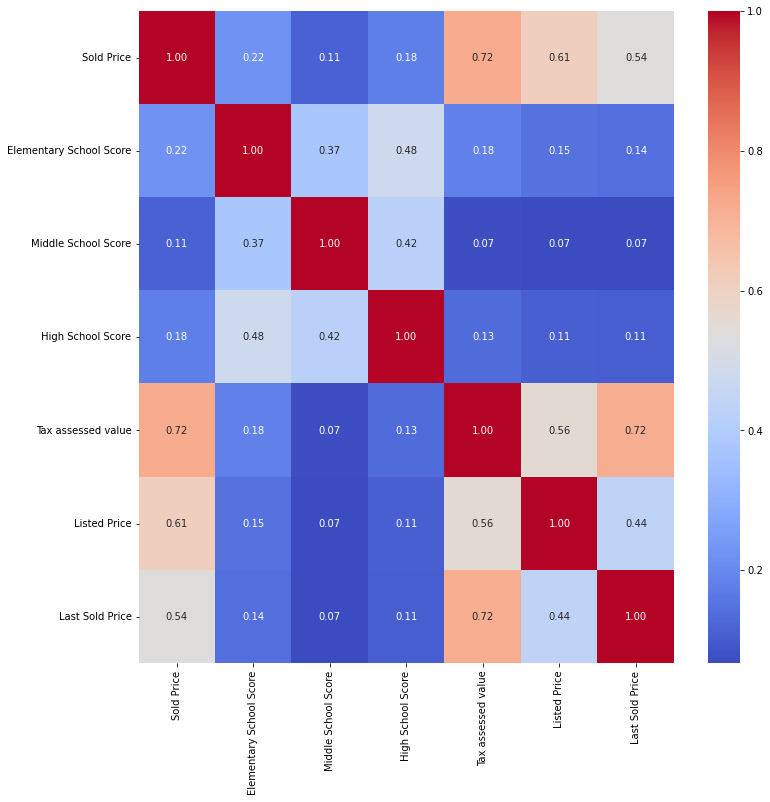

In [42]:
plt.figure(figsize = (12, 12))
seaborn.heatmap(train_processed.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

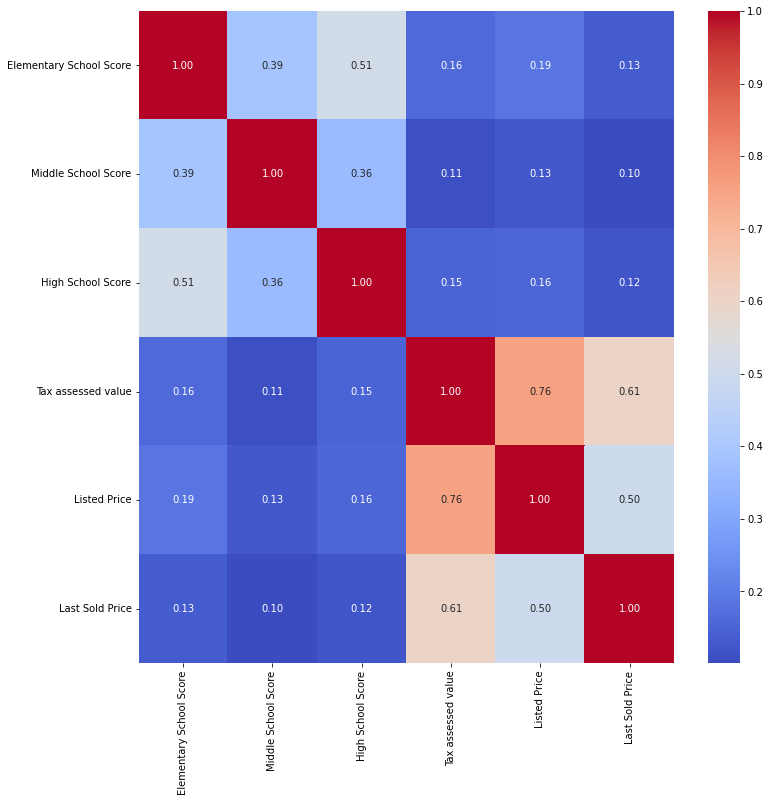

In [43]:
plt.figure(figsize = (12, 12))
seaborn.heatmap(test_processed.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

#Making training and testing datasets

In [44]:
y = train_processed['Sold Price']
x = train_processed.drop(columns = ['Sold Price'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

print(f'X train: {x_train.shape}')
print(f'Y train: {y_train.shape}')
print()
print(f'X test: {x_test.shape}')
print(f'Y test: {y_test.shape}')

X train: (37951, 6)
Y train: (37951,)

X test: (9488, 6)
Y test: (9488,)


#Decision tree regressor

In [45]:
tree = DecisionTreeRegressor(criterion = 'squared_error')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(f'Coefficient of determination: {sklearn_metrics.r2_score(y_test, y_pred)}')

Coefficient of determination: 0.7194047389486721


1.0 - perfect prediction, 0.0 - imperfect prediction. Can be negative

#Comparison between several methods

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

models = [LinearRegression(), 
          RandomForestRegressor(n_estimators = 100, max_features = 'sqrt'),
          KNeighborsRegressor(n_neighbors = 6), 
          LinearSVR(max_iter = 10000), 
          DecisionTreeRegressor()]

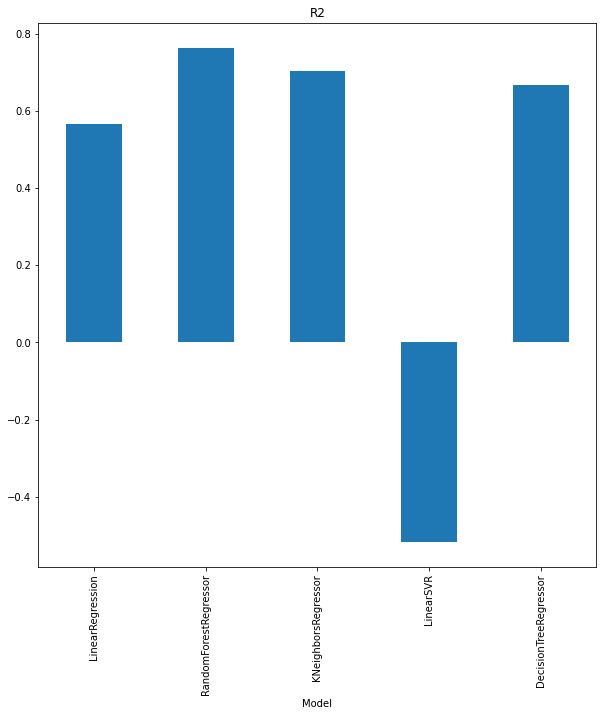

In [47]:
results = pd.DataFrame()

for model in models:
  temp_result = {}
  model_name = str(model)
  model_name = model_name[:model_name.index('(')]
  temp_result['Model'] = model_name
  model.fit(x_train, y_train) 
  temp_result['R2'] = sklearn_metrics.r2_score(y_test, model.predict(x_test))
  results = results.append([temp_result])

results.set_index('Model', inplace = True)

plt.subplots(figsize = (10, 10))
results['R2'].plot(kind = 'bar', title = 'R2')

In [48]:
print(results[results.R2 == results.R2.max()])

                            R2
Model                         
RandomForestRegressor  0.76346


#Multilayer perceptron

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 38,849
Trainable params: 38,849
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1186/1186 - 3s - loss: 3159852843008.0000 - val_loss: 1537096679424.0000 - 3s/epoch - 2ms/step
Epoch 2/1000
1186/1186 - 2s - loss: 1317350670336.0000 - val_loss: 129054448

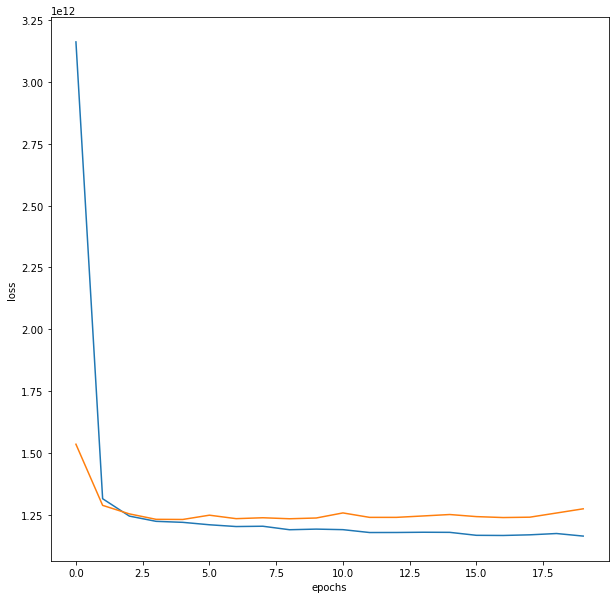

In [49]:
perceptron = Sequential()

activation_function = 'relu'
perceptron.add(Dense(256, input_dim = x_train.shape[1], activation = activation_function))
perceptron.add(Dense(128, activation = activation_function))
perceptron.add(Dense(32, activation = activation_function))
perceptron.add(Dense(1))

perceptron.compile(loss = 'mean_squared_error', optimizer = 'adam')
perceptron.summary()

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-6, patience = 15, verbose = 1, mode = 'auto', restore_best_weights = True)

fit_data = perceptron.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 2, callbacks = [monitor], epochs = 1000)
history = fit_data.history

print()
mse = sklearn_metrics.mean_squared_error(perceptron.predict(x_test), y_test)
print(f'Final score (MSE): {mse}')
rmse = np.sqrt(mse)
print(f'Final score (RMSE): {rmse}')
print()

loss_values = history['loss']
validation_loss_values = history['val_loss']

plt.figure(figsize = (10, 10))
plt.plot(loss_values, label = 'loss values')
plt.plot(validation_loss_values, label = 'validation loss values')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

#Predictions

In [50]:
def chart_regression(prediction, y, sort = True):
  t = pd.DataFrame({'prediction': prediction, 'y': y})
  if sort:
    t.sort_values(by = ['y'], inplace = True)
  plt.figure(figsize = (14, 14))
  plt.plot(t['prediction'].tolist(), label = 'prediction')
  plt.plot(t['y'].tolist(), label = 'expected')
  plt.ylabel('output')
  plt.legend()
  plt.show()

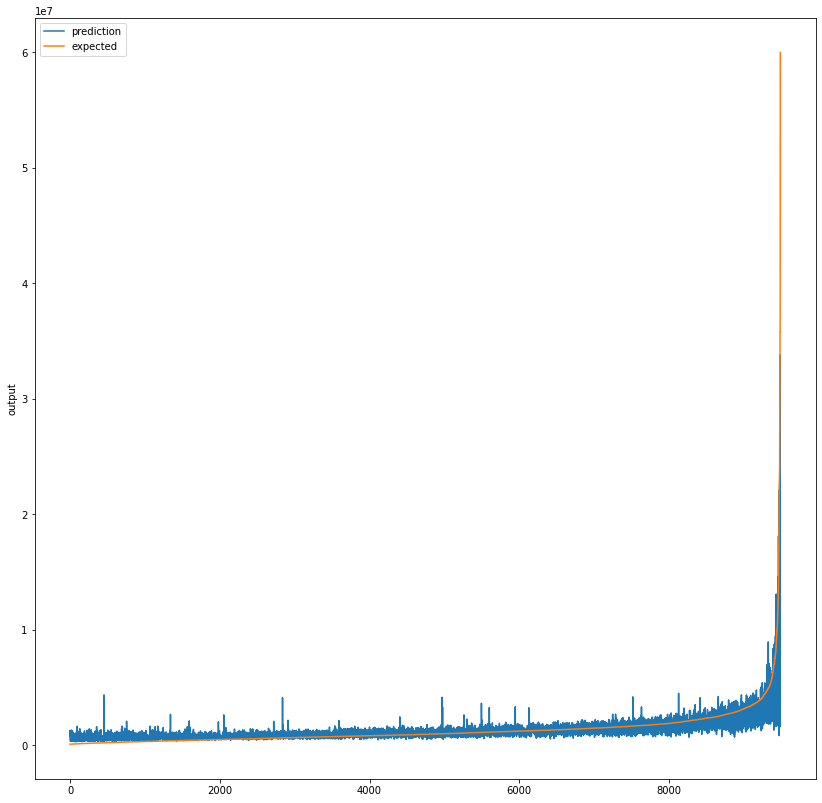

In [51]:
test_prediction = perceptron.predict(x_test)

chart_regression(test_prediction.flatten(), y_test)

#Multilayer perceptron (Keras Tuner)

In [ ]:
def build_model(hp):
  activation_function = hp.Choice('activation', values = ['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
  model = Sequential()
  model.add(Dense(units = hp.Int('units_input', min_value = 32, max_value = 512, step = 32), input_dim = x_train.shape[1], activation = activation_function))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  return model

In [ ]:
tuner = RandomSearch(build_model, objective = 'val_loss', max_trials = 80, directory = 'test_directory')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(x_train, y_train, batch_size = 256, epochs = 20, validation_split = 0.2)

Trial 20 Complete [00h 00m 11s]
val_loss: 4165596872704.0

Best val_loss So Far: 3056504143872.0
Total elapsed time: 00h 03m 54s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: selu
units_input: 384
Score: 3056504143872.0
Trial summary
Hyperparameters:
activation: elu
units_input: 480
Score: 3056619225088.0
Trial summary
Hyperparameters:
activation: relu
units_input: 480
Score: 3056620535808.0
Trial summary
Hyperparameters:
activation: relu
units_input: 416
Score: 3056904437760.0
Trial summary
Hyperparameters:
activation: relu
units_input: 448
Score: 3056915185664.0
Trial summary
Hyperparameters:
activation: relu
units_input: 320
Score: 3057221894144.0
Trial summary
Hyperparameters:
activation: selu
units_input: 256
Score: 3057290575872.0
Trial summary
Hyperparameters:
activation: elu
units_input: 288
Score: 3057443930112.0
Trial summary
Hyperparameters:
activation: elu
units_input: 352
Score: 3057550098432.0
Trial summary
Hyperparameters:
activation: selu
units_input: 192
Score: 3057627430912.0


In [ ]:
models = tuner.get_best_models(num_models = 3)
models

In [ ]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 385       
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________
297/297 [==============================] - 1s 2ms/step - loss: 3561510141952.0000

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               8160      
                                                                 
 dense_1 (Dense)             (None, 1)                 481       
                 

#Making file with predictions

In [ ]:
final_prediction = perceptron.predict(test_processed)
final_prediction = final_prediction.flatten()

final_prediction

array([1293231.4,  922980. , 1152016.2, ..., 1380275.6, 1306444.2,
       1311910.2], dtype=float32)

In [ ]:
final_prediction = models[1].predict(test_processed) #random forest regression
final_prediction

array([1239622.64, 1407707.5 , 1304076.9 , ...,  464785.26, 2306215.  ,
        675433.01])

In [ ]:
submission = pd.DataFrame({'Id': test_processed['Id'], 'Sold Price': final_prediction})
submission.to_csv('my_submission.csv', index = False)

my_submission = pd.read_csv('my_submission.csv')
my_submission


,Id,Sold Price
0,47439,1293231.4
1,47440,922980.0
2,47441,1152016.2
3,47442,1203675.2
4,47443,1975886.0
...,...,...
31621,79060,8528892.0
31622,79061,1214759.0
31623,79062,1380275.6
31624,79063,1306444.2
